kalman_filter

https://github.com/napwhale/radarock/blob/main/kalman_filter.py



In [4]:
import numpy as np
import matplotlib.pyplot as plt



# Kalman Filter filter the prediction with new observation.
def kalman_filter(x_, P_, F, Q, z, R, H, B=0, y=0):
    # time update
    x = F * x_ + B * y
    P = F * P_* F.T + Q

    # measurement update
    K = P * H.T / (H * P * H.T + R)
    x = x + K * (z - H * x)
    P = P - K * H * P

    return x, P





In [5]:
x = np.mat([[0], [1]])    # init vector (p,v)
P = np.mat(np.eye(2))    # covariance matrix 
F = np.mat([[1, 1], [0, 1]])    # transform matrix
Q = 1e-4 * np.mat(np.eye(2))    # transform uncertainty

z = np.arange(100)    # real position
noise = 10*np.random.normal(0, 1, 100)     # add noise
z = np.mat(z+noise)     # observed position
R = np.mat([1])     # observed uncertainty
H = np.mat([1, 0])    # convert matrix x-->z



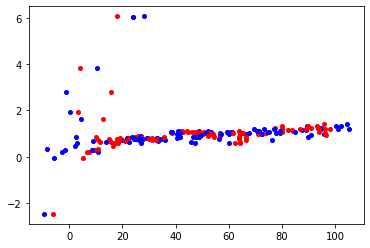

In [6]:
for i in range(100):
    x, P = kalman_filter(x, P, F, Q, z[0, i], R, H)
    plt.plot(x[0, 0], x[1, 0], 'ro', markersize = 4)
    plt.plot(z[0, i], x[1, 0], 'bo', markersize = 4)
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_30384/128656946.py, line 3)

994
995
996
997
998
999
1000
7
三分贝宽度: 0.6000000000000001 微秒


d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


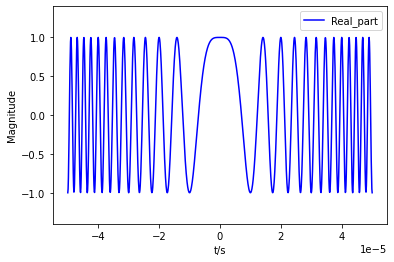

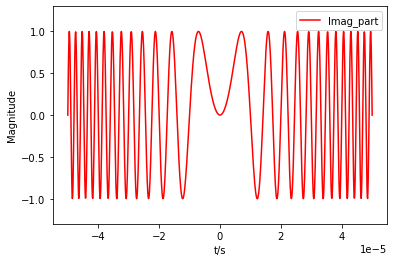

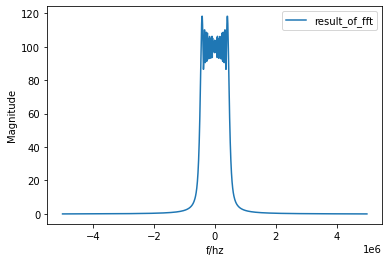

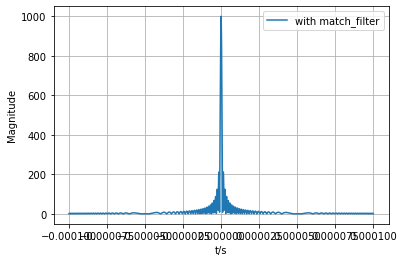

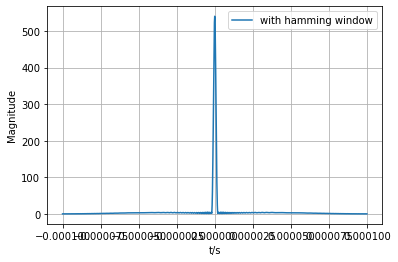

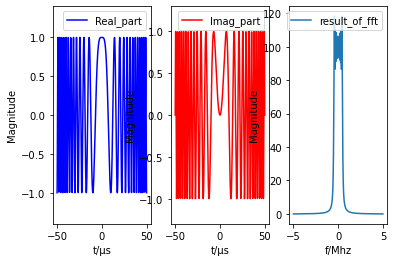

In [5]:
import numpy as np

import matplotlib.pyplot as plt



fs = 1e7
B = 1e6
T = 1e-4
t = np.arange(-T/2,T/2,1/fs)
t0 = np.arange(-T,T,1/fs)

#f0 = 2e6
####this sets up the signal
f0 = 0
p = 2*np.pi
fr = B/(2*T)
fre = fr*t
phase0 = f0+fre
phase = phase0*t
pai = phase*p
c = np.cos(pai)
s = np.sin(pai)

###fig1 for real ,fig2 for imag
fg1 = plt.figure()
plt.plot(t,c,'b-',label='Real_part')
plt.ylim((-1.4,1.4))
plt.xlabel('t/s')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
#plt.savefig('D:\\real.png')
#plt.show()

fg2 = plt.figure()
plt.plot(t,s,'r-',label='Imag_part')
plt.ylim((-1.3,1.3))
plt.xlabel('t/s')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
#plt.savefig('D:\\imga.png')
#plt.show()

#fg1.show()
#fg2.show()
###for fft
sigc = np.array(c)
sigs = np.array(s)
l = len(c)
sig = np.zeros_like(sigc,dtype=complex)  ##default dtype is float,should declare first

for i in range(l):
    sig[i] = complex(sigc[i],sigs[i])
  
sig01 = abs(np.fft.fft(sig))
sig0 = np.fft.fftshift(sig01)
l0 = len(sig0)
f0 = np.arange(l0)/l0
f = fs * f0-(fs/B)*B/2

fig3=plt.figure()
plt.plot(f,sig0,label='result_of_fft')
#plt.ylim((0,16))
plt.xlabel('f/hz')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
#plt.savefig('D:\\fft.png')
#fig3.show()

###with match filter
h = np.zeros_like(sigc,dtype=complex)

for j in range(l):
    h[j] = complex(sigc[j],-sigs[j])
    
s0 = np.convolve(sig,h)
s02 = abs(s0)


lh = len(s02)
#m = max(s02)

fig4 = plt.figure()
plt.plot(t0,s02,label='with match_filter')
#plt.plot(abs(np.diff(s02)),label='diff_of_s02')
plt.legend(loc='upper right')
plt.xlabel('t/s')
plt.ylabel('Magnitude')
plt.grid(True)
#plt.savefig('D:\\mf.png')
fig4.show()



#####diff
# di = []#np.array([])
# #l
# for k in range(lh-2):
#     if s02[k+1]>s02[k]:
#         if s02[k+1]>s02[k+2]:
#             di = di.append(s02[k])
#         else:
#             di = di
#     else:
#         di = di
# print(di)
#np.delete(extrem0,np.where(extrem0==peak),axis=0)
#e = max(extrem0)




###hamming window

w1 = np.cos(np.pi*t/T)
w = 0.08 + 0.92 * w1 * w1

hw = h * w
hw0 = abs(np.convolve(sig,hw))

#m = max(hw0)

#sli = np.zeros(74)
#for k in range(74):
#    sli[k] = hw0[k+25]
#m2 = max(sli)
#print('最大值:',m)
#print('副瓣:',m2)


fig5 = plt.figure()
plt.plot(t0,hw0,label='with hamming window')
#plt.plot(t0,s02,label='match filter')
plt.xlabel('t/s')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
plt.grid(True)
fig5.show()

#fig6 = plt.figure()
#plt.scatter(t0,hw0,label='with hamming window')
#plt.legend(loc='upper right')
#fig6.show()

###for the second biggest
m = max(hw0)
m3d = 0.707*m
cout = 0
for n in range(l):
    if hw0[n]>=m3d:
        cout = cout + 1
        print(n)

print(cout)
t3d = 2*T/((fs/B)*200)*(cout-1)
print('三分贝宽度:',t3d*1e6,'微秒')


###full fig about changing fs
fig7 = plt.figure()
plt.subplot(1,3,1)
plt.plot(t*1e6,c,'b-',label='Real_part')
plt.ylim((-1.4,1.4))
plt.xlabel('t/μs')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')

plt.subplot(1,3,2)
plt.plot(t*1e6,s,'r-',label='Imag_part')
plt.ylim((-1.3,1.3))
plt.xlabel('t/μs')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')

plt.subplot(1,3,3)
plt.plot(f/1e6,sig0,label='result_of_fft')
#plt.ylim((0,16))
plt.xlabel('f/Mhz')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')


delay num:  238
target loc:  238


d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


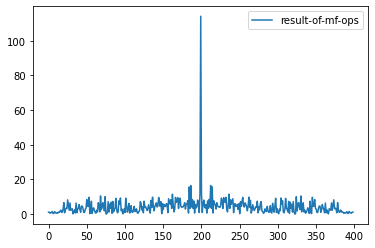

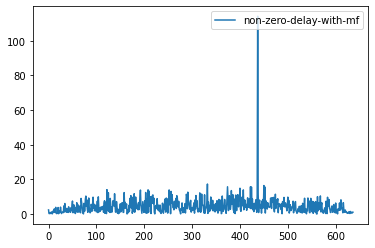

In [6]:
#########match-filter#######

import numpy as np
import matplotlib.pyplot as plt


def wgn(x,snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)
    mu = 0
    npower = xpower/snr
    sigma = np.sqrt(npower) #####standard-deviation
    return np.random.normal(mu,sigma,size=len(x)),sigma,mu

N = 200   ####signal length
s_o = np.zeros(N)   ####original-signal

s_o[20] = 2
s_o[100] = 1
s_o[150] = 3

[w,sqrt_sig,mean] = wgn(s_o,15)

s = s_o + w   #####generate-signal-with-white-gaussin-noise

h = np.conj(s[::-1])   ####conjugate-and-flip

test = np.convolve(s,h)

a_test = abs(test)

fig1 = plt.figure()

plt.plot(a_test,label='result-of-mf-ops')
plt.legend(loc='upper right')
#fig1.show()

######the aforementioned is 0 delay
######the following is with non-zero delay

delaylen = np.random.randint(0,500,size=1)
print('delay num: ',delaylen[0])

afore = np.random.normal(mean,sqrt_sig,size=delaylen)

total = np.concatenate((afore,s))

delay_out = abs(np.convolve(total,h))


fig2 = plt.figure()

plt.plot(delay_out,label='non-zero-delay-with-mf')
plt.legend(loc='upper right')
fig2.show()

####count the delay number,find out the location

loc = len(delay_out)-len(a_test)
print('target loc: ',loc)

noise power(one pulse period) : 67dB
signal power(one pulse period) ; 35dB


d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log10
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:81: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


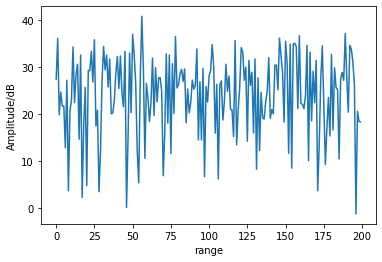

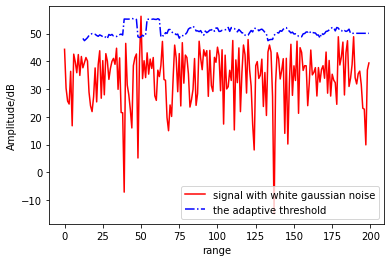

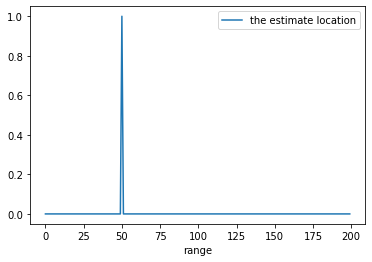

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def awgn(x,snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)
    mu = 0
    npower = xpower/snr
    sigma = np.sqrt(npower)
    return np.random.normal(mu,sigma,size=len(x)),sigma

N = 200
s = np.zeros(N)
sig_db = 35
s[50] = np.sqrt(10**(sig_db/10.0))
[w1,sigma] = awgn(s,5) ####this w is constant if awgn is called only once
s1 = s+w1   
total = 10*np.log(np.sum(s1**2)/N)####estimate sigma
print('noise power(one pulse period) : %ddB'%total)
print('signal power(one pulse period) ; %ddB'%sig_db)

w0 = np.zeros((N,10))
for k in range(10):
    [w,sigma] = awgn(s,5)
    w0[:,k] = w

s0 = np.concatenate((s+w0[:,0],s+w0[:,1],s+w0[:,2],s+w0[:,3],s+w0[:,4],s+w0[:,5],s+w0[:,6],s+w0[:,7],s+w0[:,8],s+w0[:,9]))##this just generates the same sequence
sc0 = np.zeros(N)


for j in range(10):
    sc0 = sc0 + s0[j*N:(j+1)*N]

sc = sc0
#sc = s+w   ###this for no accumulation
fig1 = plt.figure()
plt.plot(10*np.log10(s1**2),label='one period clutter')
plt.ylabel('Amplitude/dB')
plt.xlabel('range')
fig1.show()

####cfar####
#sc = sc**2
pfa = 1e-4
g = 2
r = 10
n = 2*r
r_cell = np.zeros(n)
test = np.zeros(N)
test_ideal = np.zeros(N)
sig_loc = np.zeros(N)
sigma0 = sigma**2

for i in range(N):
    if i-g-r>=0 and i+g+r<=N-1:
        r_cell = np.concatenate((sc[i-g-r:i-g-1],sc[i+g+1:r+i+g]))
        
    sigma2_e = np.sum(r_cell**2)/n
    #print(sigma2_e)
    a_temp = pfa**(-1/n)
    alpha = n*(a_temp-1)
    alpha0 = -np.log(pfa)
    #print(alpha)
    test_ideal[i] = alpha0*sigma0   ###sigma appears in square not in db,10sigma
    test[i] = alpha*sigma2_e
    #test[i] = sigma2_e
    if test[i]<sc[i]**2 and i-g-r>=0 and i+g+r<=N-1:
        sig_loc[i]=1

fig2 = plt.figure()

plt.plot(10*np.log10(sc**2),'r-',label='signal with white gaussian noise')
plt.ylabel('Amplitude/dB')
plt.xlabel('range')
plt.legend(loc='lower right')
# plt.hold(True)
#plt.plot(test,'b-')
plt.plot(10*np.log10(test),'b-.',label='the adaptive threshold')
plt.legend(loc='lower right')
# plt.hold(False)
fig2.show()

fig3 = plt.figure()

plt.plot(sig_loc,label='the estimate location')
plt.legend(loc='upper right')
plt.xlabel('range')
fig3.show()


0.0001


d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


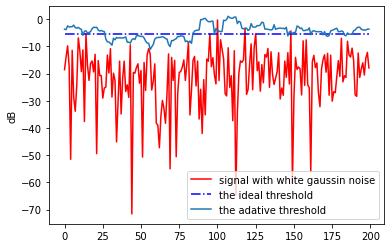

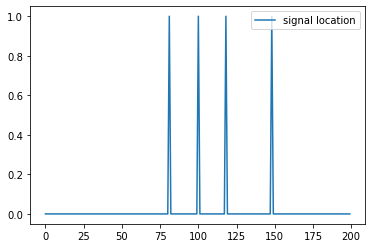

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def wgn(x,snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)
    mu = 0
    npower = xpower/snr
    sigma = np.sqrt(npower)
    #return np.random.rayleigh(sigma,size=len(x))
    return np.random.normal(mu,sigma,size=len(x)),sigma

#mu = 0
#sigma = 1
N = 200
pfa = 1e-4
print(pfa)
s = np.zeros(N)
#s[25] = 2
s[100] = 1
#s[150] = 3

[w,sigma0]=wgn(s,15)
sigma0 = sigma0**2
#si = s + wgn(s,10) ##snr=10
si = s + w
#a = np.random.normal(mu,sigma,size=200)
#sm = np.sum(s1)/len(s1)
#print(s1)
s1 = si**2

#a[100] = 2



####CA_CFAR
####guard cell=4,refer cell=10
g = 2
r = 10
n = 2*r
r_cell = np.zeros(n)
test = np.zeros(N)
test_ideal = np.zeros(N)
sig_loc = np.zeros(N)

for i in range(N):
    if i <= g:
       r_cell = np.concatenate((s1[N-r-g+i-1:N-g+i-1],s1[i+g+1:r+i+g+1]))
       #print(r_cell)
    elif g< i <=r+g-1:
        r_cell = np.concatenate((s1[N-r+i-g:N-1],s1[0:i-g-1],s1[i+g+1:r+i+g+1]))
        #print(r_cell)
    elif N-1-r-g<i<N-1-g:
        ###index187 right side with 12points for gurad and reference
        ###so < should not contain =
        r_cell = np.concatenate((s1[i-g-r:i-g-1],s1[i+g+1:N-1],s1[0:r-N+i+g]))
        #print(r_cell)
    elif N-1-g<=i:
        r_cell = np.concatenate((s1[i-g-r:i-g-1],s1[g-N+1+i:g-N+i+r]))
        #print(r_cell)
    else:
        r_cell = np.concatenate((s1[i-g-r:i-g-1],s1[i+g+1:r+i+g]))
        #print(r_cell)
        
    sigma2_e = np.sum(r_cell)/n
    #print(sigma2_e)
    a_temp = pfa**(-1/n)
    alpha = n*(a_temp-1)
    alpha0 = -np.log(pfa)
    #print(alpha)
    test_ideal[i] = alpha0*sigma0   ###sigma appears in square not in db
    test[i] = alpha*sigma2_e
    #test[i] = sigma2_e
    if test[i]<s1[i]:
        sig_loc[i]=1
        


fig1 = plt.figure()

###the y axis is appeared in dB
#plt.plot(s1,'r-')
plt.plot(10*np.log10(s1),'r-',label='signal with white gaussin noise')
plt.ylabel('dB')
plt.legend(loc='lower right')


# plt.hold(True)

#plt.plot(test,'b-')
plt.plot(10*np.log10(test_ideal),'b-.',label='the ideal threshold')
plt.legend(loc='lower right')


# plt.hold(True)

plt.plot(10*np.log10(test),'-',label='the adative threshold')
plt.legend(loc='lower right')

# plt.hold(False)

fig1.show()

fig2 = plt.figure()

plt.plot(sig_loc,label='signal location')
plt.legend(loc='upper right')

fig2.show()


